#### Statistical Based Anomaly Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
data = np.random.normal(40,10,1000)  # mean = 40, std = 10

# compute z scores
mean = np.mean(data)
std = np.std(data)
z_scores = (data - mean) / std

# identitfy anomalies 
threshold = 3
anomalies = data[np.abs(z_scores) > threshold]

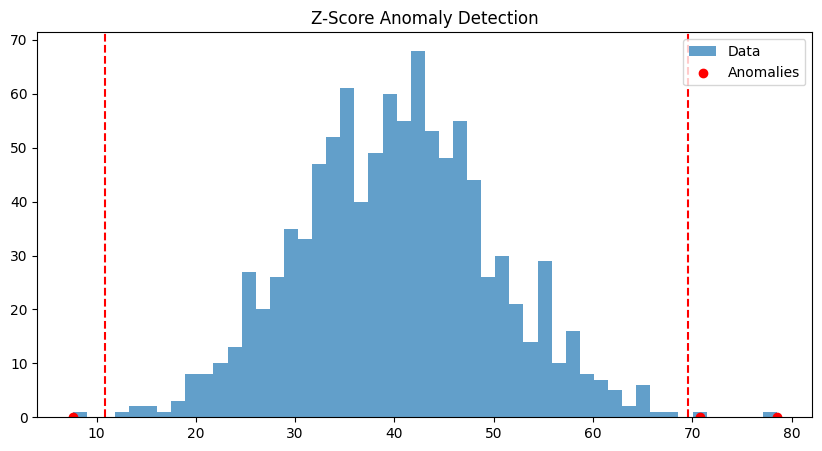

In [3]:
# Visualization
plt.figure(figsize=(10, 5))
plt.hist(data, bins=50, alpha=0.7, label="Data")
plt.scatter(anomalies, [0]*len(anomalies), color='red', label="Anomalies", zorder=2)
plt.axvline(mean + threshold*std, color='r', linestyle='dashed')
plt.axvline(mean - threshold*std, color='r', linestyle='dashed')
plt.legend()
plt.title("Z-Score Anomaly Detection")
plt.show()

#### Distance Based Anomaly Detection

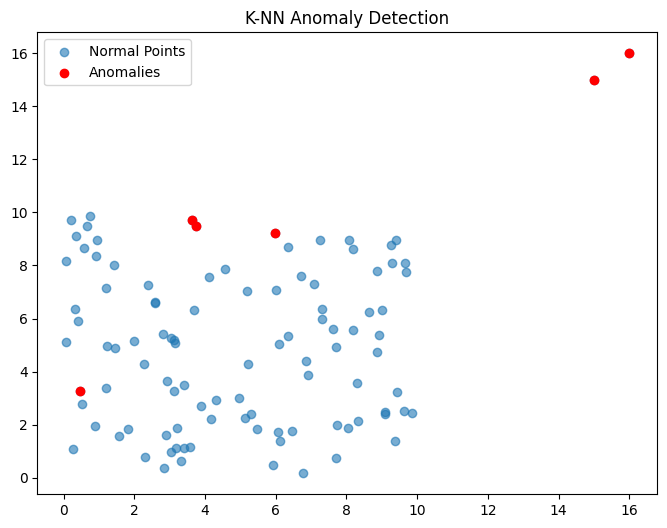

In [4]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Generate synthetic 2D data
np.random.seed(42)
X = np.random.rand(100, 2) * 10  # Normal data
X = np.vstack([X, [[15, 15], [16, 16]]])  # Inject anomalies

# Apply KNN
k = 5
nbrs = NearestNeighbors(n_neighbors=k)
nbrs.fit(X)
distances, indices = nbrs.kneighbors(X)

# Identify anomalies based on distance threshold
threshold = np.percentile(distances[:, -1], 95)
anomalies = X[distances[:, -1] > threshold]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Points", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label="Anomalies")
plt.legend()
plt.title("K-NN Anomaly Detection")
plt.show()


#### Density Based Anomaly Detection

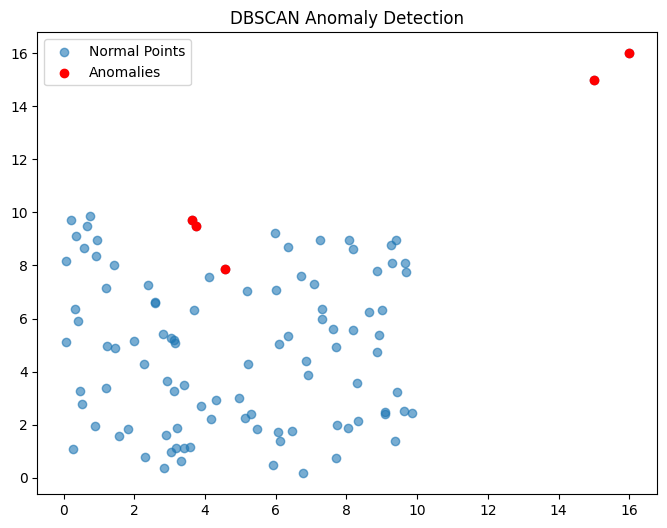

In [5]:
from sklearn.cluster import DBSCAN

# DBSCAN Clustering
dbscan = DBSCAN(eps=1.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Identify anomalies (labeled as -1)
anomalies = X[labels == -1]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Points", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label="Anomalies")
plt.legend()
plt.title("DBSCAN Anomaly Detection")
plt.show()


#### Clustering Based Anomaly Detection

C:\Users\sunny\.conda\envs\torch_env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


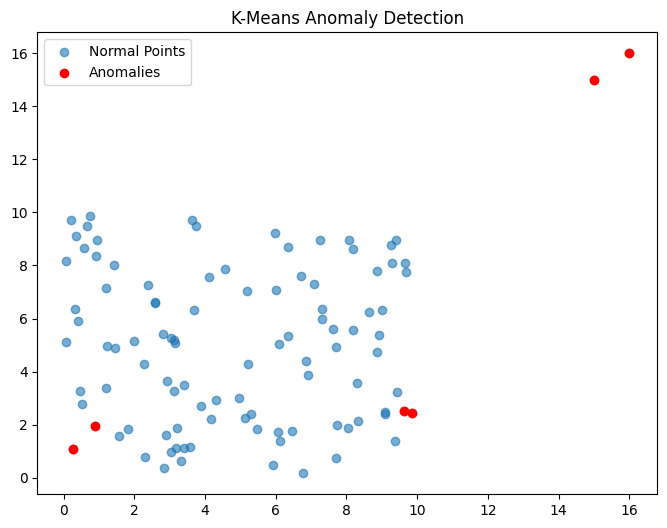

In [6]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
distances = np.linalg.norm(X - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Identify anomalies
threshold = np.percentile(distances, 95)
anomalies = X[distances > threshold]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Points", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label="Anomalies")
plt.legend()
plt.title("K-Means Anomaly Detection")
plt.show()


#### Machine Learning Based Anomaly Detection

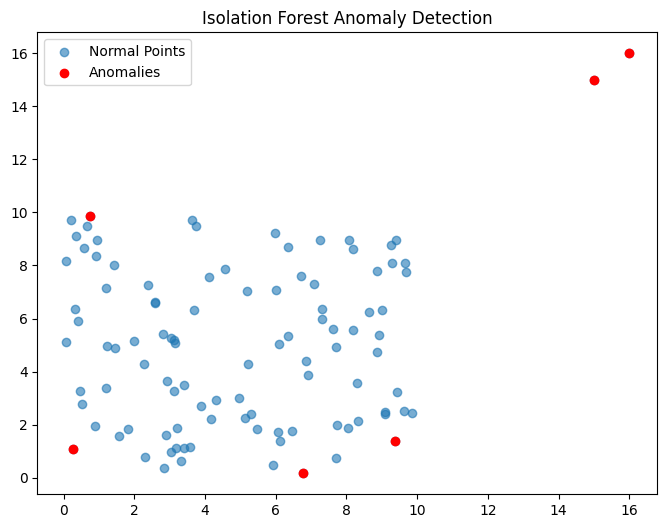

In [7]:
from sklearn.ensemble import IsolationForest

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(X)

# Predict anomalies
labels = iso_forest.predict(X)
anomalies = X[labels == -1]

# Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], label="Normal Points", alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='red', label="Anomalies")
plt.legend()
plt.title("Isolation Forest Anomaly Detection")
plt.show()
